Text(0, 0.5, 'x2')

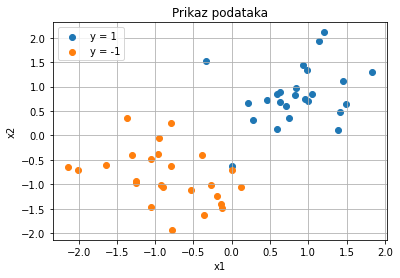

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cvxopt import matrix, solvers
from sklearn.metrics import confusion_matrix
solvers.options['show_progress'] = False

# ucitavanje podataka
data = pd.read_csv('/content/drive/MyDrive/svmData_ls.csv', header=None)
data = data.values

# standardizacija parametara
mean = np.mean(data[:,0:2],axis=0)
std = np.std(data[:,0:2],axis=0)
for i in range(0,len(mean)):
  data[:,i] = (data[:,i]-mean[i])/std[i]


plt.scatter(data[data[:,2] == 1][:,0],data[data[:,2] == 1][:,1])
plt.scatter(data[data[:,2] == -1][:,0],data[data[:,2] == -1][:,1])
plt.title('Prikaz podataka')
plt.legend(['y = 1','y = -1'])
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')


In [2]:
# linearno separabilne klase
def SVM_lin(data,C='inf'):

  m = len(data)
  P = np.zeros([m,m])
  for i in range(m):
    for j in range(m):
      P[i,j] = data[i,2]*data[j,2]*np.dot(data[i,:2],data[j,:2])
  P = matrix(P)

  q = np.ones([m,1])*(-1)
  q = matrix(q)


  if (C=='inf'):
    G = np.diag(np.ones(m))*(-1)
    G = matrix(G)
    h = np.zeros([m,1])
    h = matrix(h)
  else:
    G = np.append(np.diag(np.ones(m)*(-1)),np.diag(np.ones(m)),axis=0)
    G = matrix(G)
    h = np.append(np.zeros([m,1]),C*np.ones([m,1]))
    h = matrix(h)

  A = np.zeros([1,m]) 
  for i in range(m):
    A[0,i] = data[i,2]
  A = matrix(A)

  b = 0.0
  b = matrix(b)

  alpha = np.array(solvers.qp(P,q,G,h,A,b)['x'])
  w = sum((alpha.T*data[:,2]).T*data[:,:2])

  noseci_vektori = []
  b = 0
  for i in range(0,m):
    if (alpha[i]>0.001):
      noseci_vektori = np.append(noseci_vektori,data[i,:])
      if b==0:
        b = 1/data[i,2]-np.dot(w,data[i,:2])
  noseci_vektori = noseci_vektori.reshape(int(len(noseci_vektori)/3),3)

  return w,b,noseci_vektori,alpha



In [3]:
def plot_results(data,w,b,noseci_vektori,title='SVM'):
  x_1 = np.array(np.linspace(-2,2,10))
  x_2 = np.zeros(len(x_1))
  for i in range(len(x_1)):
    x_2[i] = -b/w[1]-w[0]/w[1]*x_1[i] 
  plt.plot(x_1,x_2,'k--')
  plt.scatter(data[data[:,2] == 1][:,0],data[data[:,2] == 1][:,1])
  plt.scatter(data[data[:,2] == -1][:,0],data[data[:,2] == -1][:,1])
  plt.scatter(noseci_vektori[:, 0],noseci_vektori[:, 1], 
        s=100, marker='p', facecolors='none', edgecolor='green', linewidth=2)
  plt.title(title)
  plt.legend(['klasifikator','y = 1','y = -1'])
  plt.grid()
  plt.xlabel('x1')
  plt.ylabel('x2')


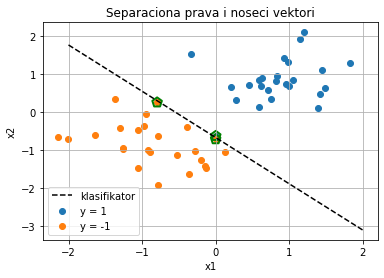

In [ ]:
p# linearno separabilne klase bez sarke
w,b,noseci_vektori,a = SVM_lin(data)
plot_results(data,w,b,noseci_vektori,'Separaciona prava i noseci vektori')


Text(0, 0.5, 'funkcija gubitka')

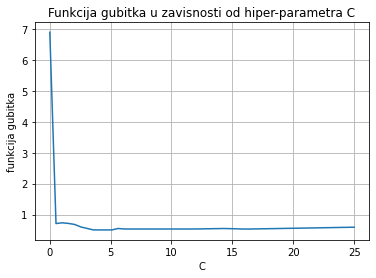

In [10]:
# linearno separabilne klase sa sarkom
C = np.array(np.linspace(0.01,25,50))
gama = []
k = 5
foldovi = np.reshape(data,[k,round(len(data)/k),3])

for i in range(0,len(C)): # petlja po tau
  pom = []
  for j in range(0,k): # petlja po foldovima
    prazan_obucavajuci = 1
    for l in range(0,k): # raspodjela foldova u testirajuci i obucavajuce
      if j==l:
        testirajuci = foldovi [j,:,:]
      else:
        if prazan_obucavajuci==1:
          obucavajuci = foldovi[l,:,:]
          prazan_obucavajuci = 0
        else:
          obucavajuci = np.concatenate((obucavajuci,foldovi[l,:,:]),axis=0)

    w,b,noseci_vektori,a = SVM_lin(obucavajuci,C[i])
    loss_function = 1-testirajuci[:,2]*(np.dot(testirajuci[:,:2],w)+b)
    loss_function = sum(loss_function[loss_function>0])
    pom = np.append(pom,loss_function)
  gama = np.append(gama,sum(pom)/k)

plt.plot(C,gama)
plt.grid()
plt.title('Funkcija gubitka u zavisnosti od hiper-parametra C')
plt.xlabel('C')
plt.ylabel('funkcija gubitka')



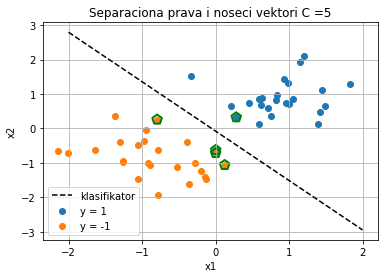

In [11]:
C = 5
w,b,noseci_vektori,a = SVM_lin(data,C)
plot_results(data,w,b,noseci_vektori,'Separaciona prava i noseci vektori C ='+str(C))